# Forest Cover Type Prediction

## Project description : 
*Get started on this competition with Kaggle Scripts. No data download or local environment needed!*

*Random forests? Cover trees? Not so fast, computer nerds. We're talking about the real thing.*

*In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.*

*This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.*

Every variables described in the description seem to be cartographic, no trap here, we can use them all.

## Ressources : 
* data origin : Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science

## github :
 https://github.com/ClaireGayral/formation_openclassroom/tree/master/P8_gayral_claire

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pickle


DATA_PATH = "/home/clairegayral/Documents/openclassroom/data/P8/forest/"
RES_PATH = "/home/clairegayral/Documents/openclassroom/res/P8/"

## my .py : 
from script01_duplicates import *
from script02_missing_values_treatment import *
from script03_univariate_analysis import *
from script04_multivariate_analysis import *
from script05_CV_regression import *
from script06_reduce_dim import *

## extract list of text :
from bs4 import BeautifulSoup
import re
# from sklearn.feature_extraction.s import s# import ENGLISH_STOP_WORDS

# from sklearn import model_selection 
# from sklearn import preprocessing
# from sklearn import neighbors
# from sklearn import linear_model

# from sklearn.impute import KNNImputer
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import fbeta_score
# from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import fowlkes_mallows_score
# from sklearn.metrics.pairwise import pairwise_kernels


####################################################

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif

import re
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

############################################


# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LogisticRegression

# from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram


from bs4 import BeautifulSoup
import nltk
from collections import defaultdict
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.utils import tokenize
from gensim import corpora
from gensim import models
from gensim.models import FastText

# How to reconcile categorical and numerical data for classification ? 

## Table of contents :

<a id ="menu"></a>
1. [ Exploratory Analysis for Categorical Variables](#section1)
    1. [Outputs - the soils](#section1.1)
    2. [Categorical Input Variables](#section1.2)
        1. [Univariate Analysis](#section1.2)
        2. [Multivariate Analysis](#section1.2)
    3. [Feature engeneering](#section1.3)
        1. [Classical preprocess](#section1.3.1)
        2. [Feature selection](#section1.3.2)
        3. [Reduction of dimension](#section1.3.3)
    
2. [ Exploratory Analysis for Numerical data](#section2)
    1. [Univariate Analysis](#section2.1)
    2. [Multivariate Analysis](#section2.2)
    3. [Feature engeneering](#section2.3)
        1. [Classical preprocess](#section2.3.1)
        2. [Feature selection](#section2.3.2)
        3. [Reduction of dimension](#section2.3.3)
        
3. [Traitements sur le text](#section3)
    1. [Preprocessing sur les tokens](#section1.2)
        2. [Tokenization](#section3.1.1)
        3. [Stopwords](#section3.1.2)
        4. [Lemmatization](#section3.1.3)   
    2. [Représentation des mots](#section3.2)
          1. [Bag of Words](#section3.2.1)
          2. [tf-idf](#section3.2.2)
          3. [Word to vect](#section3.2.3)       
          4. [Représentation en nuage de mots](#section3.2.4)
<!--     3. [Réduction de dimension](#section3.3) -->



In [152]:
df_train = pd.read_csv(DATA_PATH+"/train.csv", index_col=0)
print("train data shape : ", df_train.shape)
df_train.head()

train data shape :  (15120, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [153]:
df_test = pd.read_csv(DATA_PATH+"/test.csv", index_col=0)
print("train data shape : ", df_test.shape)
df_test.head()

train data shape :  (565892, 54)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


A first reading of the data allows to separate the input variables from the output variables : 

In [154]:
X = df_train.loc[:,[col for col in df_train.columns if col != "Cover_Type"]]
y = df_train.loc[:,"Cover_Type"]

 I split categorical and numerical data to analyse them. In the [project data description](https://www.kaggle.com/c/forest-cover-type-prediction/data) every column is well defined.


In [ ]:
soil_vars = ['Soil_Type' +str(k) for k in range(1,41)]
area_vars = ['Wilderness_Area' +str(k) for k in range(1,5)]

cat_vars = soil_vars + area_vars
num_vars = [col for col in X.columns if col not in cat_vars]

<a id ="section1"></a>
<a id ="section1.1"></a>
[back to menu](#menu)

# 1. Exploratory Analysis for Categorical data

Let's begin with output data.

## 1.A Output Variable

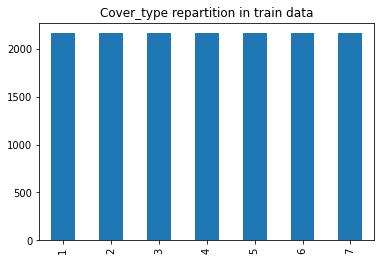

In [161]:
# sns.countplot(x = "soil_type", data = X_cat, sort)
y.value_counts().plot(kind= "bar")
plt.title("Cover_type repartition in train data")
plt.xticks(rotation=90)
plt.show()

The output categories are well represented, the repartition in each class is homogeneous.

<a id ="section1.2"></a>
[back to menu](#menu)

## 1.B Categorical Input Variables

In [155]:
## Recall :
# soil_vars = ['Soil_Type' +str(k) for k in range(1,41)]
# area_vars = ['Wilderness_Area' +str(k) for k in range(1,5)]

## remove text in var name to clarify plots : 
def get_final_int(x) : return(int(re.split(r'(\d+)', x)[-2]))

map_soil_var = {var : get_final_int(var) for var in soil_vars}
soil_cat = X.loc[:,soil_vars] 
soil_cat = soil_cat.rename(map_soil_var, axis=1)
soil_cat = soil_cat.idxmax(axis=1)

map_area_var = {var : get_final_int(var) for var in area_vars}
area_cat = X.loc[:,area_vars] 
area_cat = area_cat.rename(map_area_var, axis=1)
area_cat = area_cat.idxmax(axis=1)

<a id ="section1.2.1"></a>
[back to menu](#menu)

## 1.B.a Univariate Analysis

A quick check of the categorical variables shows that the classes are well separated (we are not in multi-label classification)

In [156]:
tmp = X.loc[:, soil_vars].sum(axis=1).value_counts()
print("Percentage of one-classe soil : ",
      np.round((tmp[tmp.index == 1]/X.shape[0]).values[0] * 100,1),
      "%")

tmp = X.loc[:, area_vars].sum(axis=1).value_counts()
print("Percentage of one-classe area : ",
      np.round((tmp[tmp.index == 1]/X.shape[0]).values[0] * 100,1),
      "%")

Percentage of one-classe soil :  100.0 %
Percentage of one-classe area :  100.0 %


Univariate analysis :

In [157]:
X_cat = pd.concat((soil_cat,area_cat), axis=1)
X_cat = X_cat.rename({0:"soil_type", 1: "area"}, axis=1)

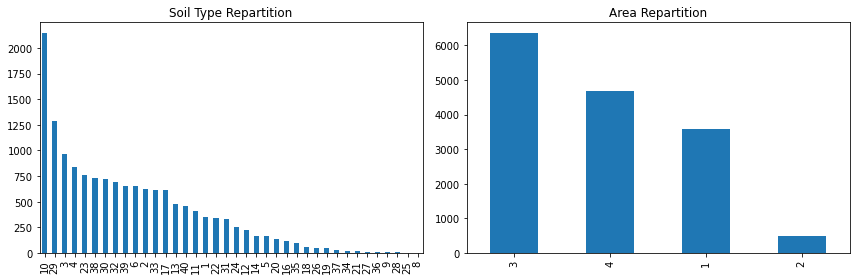

In [158]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# sns.countplot(x = "soil_type", data = X_cat, sort)
X_cat["soil_type"].value_counts().plot(kind= "bar")
plt.title("Soil Type Repartition")
plt.subplot(1,2,2)
X_cat["area"].value_counts().plot(kind= "bar")
plt.title("Area Repartition")
plt.tight_layout()
plt.show()

Note that some categories like "soil_type_25" or "2" are very badly represented
<a id ="section1.2.2"></a>
[back to menu](#menu)

## 1.B.b Multivariate Analysis
### Bivariate analysis (input/input)

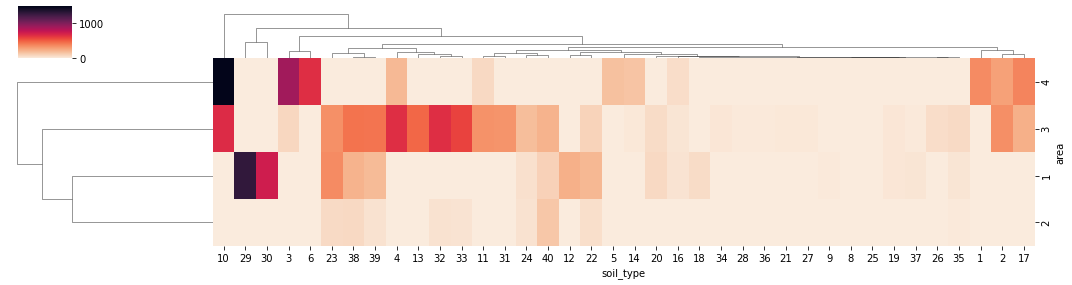

In [159]:
sns.clustermap(pd.crosstab(X_cat["area"], X_cat["soil_type"]),
               figsize=(15, 4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

The distribution of the two categories is structured: we will have to pay attention to the correlation between the two. 
It may be a good idea to use the text description of soil to gather them (TODO : see if text-mining is relevant)

In [160]:
from caterogical_vars_description import *

### Output/input categorical link :
Let's reveal the correlation between our categories and the output variable : 

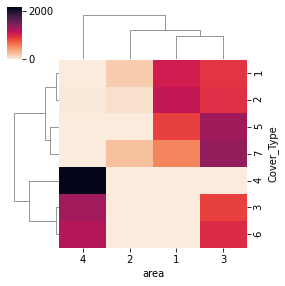

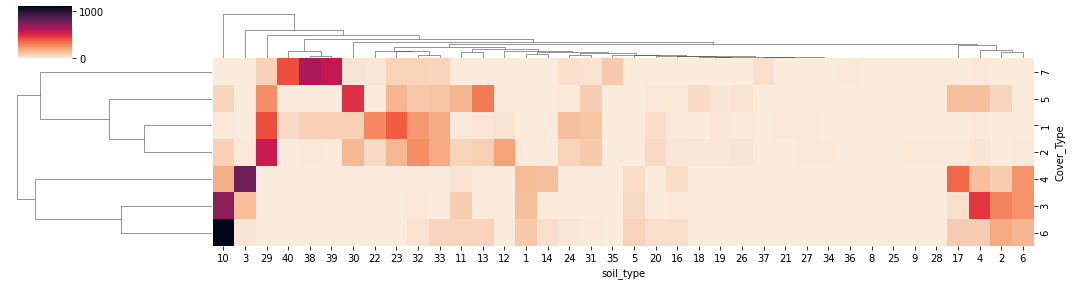

In [162]:
X_caty = pd.concat((X_cat, y), axis = 1)
sns.clustermap(pd.crosstab(X_caty["Cover_Type"],X_caty["area"]),
               figsize=(4, 4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

sns.clustermap(pd.crosstab(X_caty["Cover_Type"],X_caty["soil_type"]),
               figsize=(15,4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

There's a real link between the categorical inputs and the classification. 

<a id ="section1.3"></a>
[back to menu](#menu)

## 1.C Feature engineering : 

The selection of relevant feature is well documented in [sklearn](https://scikit-learn.org/stable/modules/feature_selection.html)

<a id ="section1.3.1"></a>
[back to menu](#menu)

### 1.C.a Classical preprocessing 
First of all, let's split the training data, and remove constant variables. 

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,cat_vars], y, random_state=10)
# train_index = X_train.index
# test_index = X_test.index

#### Drop non variant variables :

In [177]:
pd.DataFrame(np.round(pd.get_dummies(X_cat["area"]).std(), 2), columns=["std"]).transpose()

,1,2,3,4
std,0.43,0.18,0.49,0.46


In [178]:
pd.DataFrame(np.round(pd.get_dummies(X_cat["soil_type"]).std(), 2), columns=["std"]).transpose()

,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
std,0.15,0.2,0.24,0.23,0.1,0.2,0.01,0.03,0.35,0.16,...,0.15,0.21,0.2,0.04,0.08,0.03,0.05,0.21,0.2,0.17


In [179]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.001))
sel.fit(X_train)
X_train.shape[1],len(sel.get_feature_names_out())

(44, 37)

Droped variables (Not variant) are : 

In [ ]:
print([var for var in X_train.columns if var not in sel.get_feature_names_out()])

In [274]:
droped_cat_var = ['Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type15',
                 'Soil_Type25','Soil_Type28','Soil_Type36']
droped_cat_var = X_train.columns.intersection(droped_cat_var)
X_train = X_train.drop(droped_cat_var, axis = 1)
X_test = X_test.drop(droped_cat_var, axis = 1)

#### Model reference (before more feature engeneering)

In [275]:
svm = LinearSVC(dual=False).fit(X_train,y_train)
y_pred = svm.predict(X_test)
y_pred = pd.Series(y_pred,index = y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.44      0.48       543
           2       0.44      0.61      0.51       523
           3       0.49      0.47      0.48       505
           4       0.77      0.73      0.75       562
           5       0.59      0.53      0.56       544
           6       0.55      0.59      0.57       549
           7       0.88      0.81      0.84       554

    accuracy                           0.60      3780
   macro avg       0.61      0.60      0.60      3780
weighted avg       0.61      0.60      0.60      3780



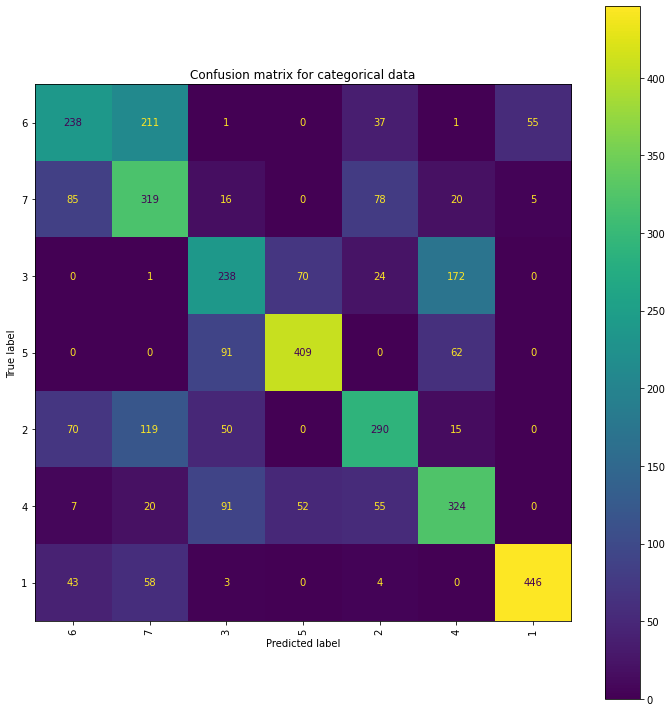

In [276]:
## Confusion 
cm = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true = y_test)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
plt.savefig(res_path+"figures/confusion_matrix_cat")
plt.tight_layout()
plt.show()

In [277]:
Y_test = pd.get_dummies(y_test)
Y_pred = pd.get_dummies(y_pred)

print("AUC = ", 
      sklearn.metrics.roc_auc_score(Y_test,Y_pred,multi_class="ovo"))
print("Balanced Accuracy = ", 
      sklearn.metrics.balanced_accuracy_score(y_test,y_pred))
print("Cohen Kappa score = ", 
      sklearn.metrics.cohen_kappa_score(y_test,y_pred))
print("Matthews Corrcoef = ", 
      sklearn.metrics.matthews_corrcoef(y_test,y_pred))
print("Hinge Loss = ", sklearn.metrics.hinge_loss(y_test,Y_pred))

AUC =  0.7648917551750781
Balanced Accuracy =  0.5965142578317818
Cohen Kappa score =  0.5321802419772571
Matthews Corrcoef =  0.5335027676205927
Hinge Loss =  0.8021164021164021


<a id ="section1.3.2"></a>
[back to menu](#menu)

### 1.C.b Feature Selection

In this section, we aim tp drop the non determinant categories in input variables.

The "importance" of each categorical variable can be chosen with a simple ridge selection, as proposed [in this sklearn example](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py)

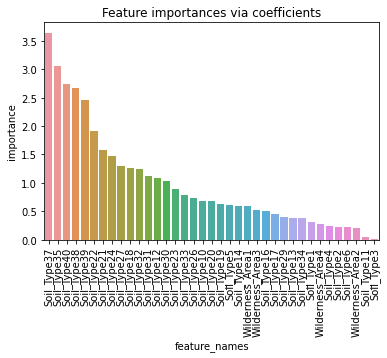

In [325]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
importance = np.abs(ridge.coef_)
feature_names = X_train.columns

tmp = pd.DataFrame(importance, index=feature_names, columns=["importance"]).reset_index()
tmp = tmp.rename({"index":"feature_names"}, axis =1)
tmp = tmp.sort_values("importance", ascending=False)
sns.barplot(y="importance", x="feature_names", data=tmp)
plt.title("Feature importances via coefficients")
plt.xticks(rotation = 90)
plt.show()

#### ANOVA + SVC
Let's compute a categorical variable selection by computing an ANOVA and git its outputs to an Support Vector Machine Classifier. 
The code is mainly copied from [this sklearn example]() 


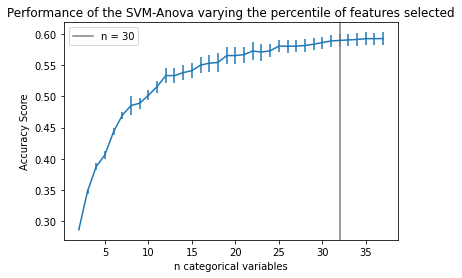

In [585]:
# from sklearn.feature_selection import SelectPercentile, chi2
# from sklearn.model_selection import cross_val_score
# # #############################################################################
# # Create a feature-selection transform, a scaler and an instance of SVM that we
# # combine together to have a full-blown estimator
# clf = Pipeline(
#     [
#         ("anova", SelectPercentile(chi2)),
#         ("scaler", StandardScaler()),
#         ("svc", SVC(gamma="auto")),
#     ]
# )

# # #############################################################################
# # Plot the cross-validation score as a function of percentile of features
# score_means = list()
# score_stds = list()
# ## from 2 to nb cat vars : 
# percentiles = np.linspace(0,100, num=X_train.shape[1]+1)[2:]

# for percentile in percentiles:
#     clf.set_params(anova__percentile=percentile)
#     this_scores = cross_val_score(clf, X_train, y_train)
#     score_means.append(this_scores.mean())
#     score_stds.append(this_scores.std())
    
# with open(res_path+"CV_gridsearch_models/"+"cat_feature_select_ANOVA_SVM"+".pkl", "wb") as f :
#     pickle.dump((percentiles, score_means, score_stds, this_scores), f, pickle.HIGHEST_PROTOCOL)

with open(res_path+"CV_gridsearch_models/"+"cat_feature_select_ANOVA_SVM"+".pkl", "rb") as f :
    (percentiles, score_means, score_stds, this_scores) = pickle.load(f)
  
plt.errorbar(range(2,len(percentiles2)+2), score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xlabel("n categorical variables")
plt.ylabel("Accuracy Score")
plt.axvline(x=32, color="grey", label="n = 30")
plt.legend()
plt.axis("tight")
plt.show()

In [584]:
this_scores

array([0.5978836 , 0.59611993, 0.57892416, 0.60626102, 0.58289242])

Adding the last variables doest not change much the model. Let's remove them and check the prediction : 

In [282]:
nb_keep = 32

anova = SelectPercentile(chi2, percentile = percentiles[nb_keep-2])
anova.fit(X_train, y_train)
print("removed variables :", [v for v in X_train.columns if v not in anova.get_feature_names_out()])

removed variables : ['Soil_Type16', 'Soil_Type19', 'Soil_Type21', 'Soil_Type27', 'Soil_Type34']


The removed categorical variables are thoose that appears the less. This feature selection might be biased by that... 

In [283]:
cat_selected_vars = anova.get_feature_names_out()

X_train_small = X_train[cat_selected_vars]
X_test_small = X_test[cat_selected_vars]

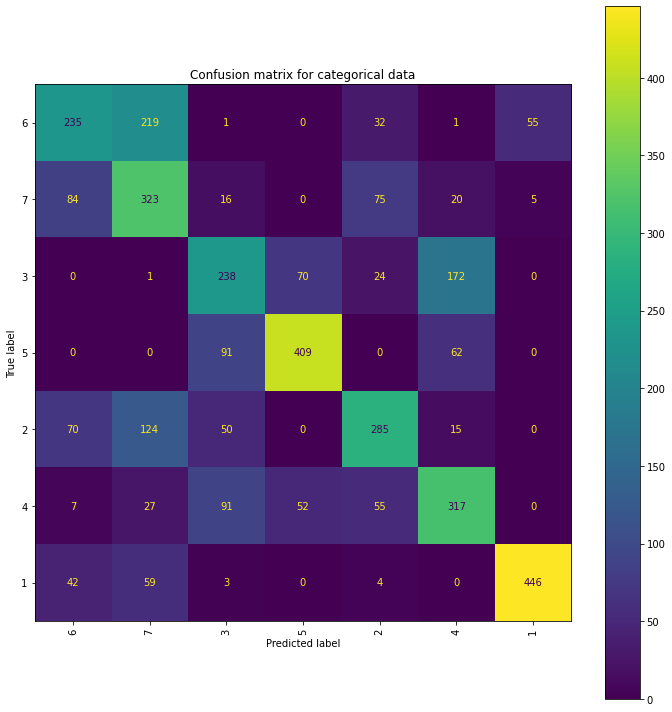

AUC =  0.7632363324998642
Balanced Accuracy =  0.5936830706652044
Cohen Kappa score =  0.5288071205222448
Matthews Corrcoef =  0.5304027362342258
Hinge Loss =  0.807936507936508


In [284]:
svm = LinearSVC(dual=False).fit(X_train_small,y_train)
y_pred = svm.predict(X_test_small)
y_pred = pd.Series(y_pred,index = y_test)

## Confusion 
cm = sklearn.metrics.confusion_matrix(y_pred=y_pred, 
                                      y_true = y_test)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
plt.savefig(res_path+"figures/confusion_matrix_cat_ANOVA")
plt.tight_layout()
plt.show()
Y_test = pd.get_dummies(y_test)
Y_pred = pd.get_dummies(y_pred)

print("AUC = ", 
      sklearn.metrics.roc_auc_score(Y_test,Y_pred,multi_class="ovo"))
print("Balanced Accuracy = ", 
      sklearn.metrics.balanced_accuracy_score(y_test,y_pred))
print("Cohen Kappa score = ", 
      sklearn.metrics.cohen_kappa_score(y_test,y_pred))
print("Matthews Corrcoef = ", 
      sklearn.metrics.matthews_corrcoef(y_test,y_pred))
print("Hinge Loss = ", sklearn.metrics.hinge_loss(y_test,Y_pred))

As a recall, without feature selection, the result where : 
* AUC =  0.7648917551750781
* Balanced Accuracy =  0.5965142578317818
* Cohen Kappa score =  0.5321802419772571
* Matthews Corrcoef =  0.5335027676205927
* Hinge Loss =  0.8021164021164021

With this feature selection, the model tend to predict "7" for cover type "4" more often than necessary. This may not be relevant.

In [288]:
print([var for var in X_train.columns if var not in cat_selected_vars])

['Soil_Type16', 'Soil_Type19', 'Soil_Type21', 'Soil_Type27', 'Soil_Type34']


#### Selecting feature importance with tree :

Another [example sklearn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py) uses tree-based classifier methods, and compare with and without permutation of variables :


In [340]:
from sklearn.ensemble import RandomForestClassifier

feature_names = X_train.columns#[f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Elapsed time to compute the importances: 0.008 seconds


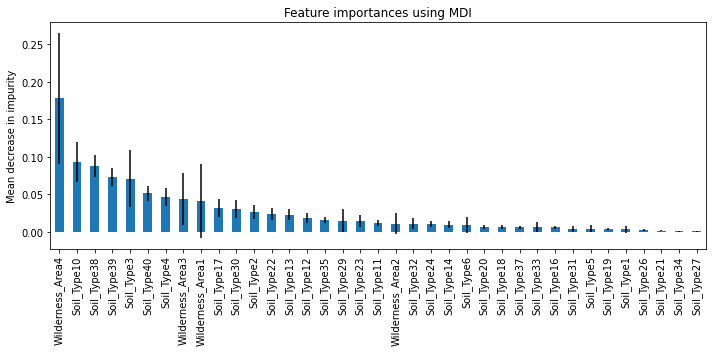

In [341]:
## Feature importance based on mean decrease in impurity
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

## plot
tmp = pd.DataFrame(importances, columns=["importance"], index=feature_names)
tmp.loc[:,"err"] = std
tmp = tmp.sort_values("importance",ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
tmp["importance"].plot.bar(yerr=tmp["err"], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Elapsed time to compute the importances: 8.629 seconds


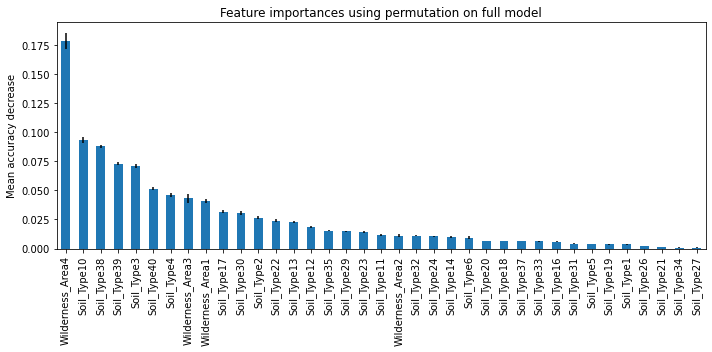

In [342]:
## Feature importance based on feature permutation
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, 
    n_repeats=10, random_state=42, n_jobs=8
    )
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(result.importances_mean, index=feature_names)

## plot
tmp = pd.DataFrame(importances,columns=["importance"], index=feature_names)
tmp.loc[:,"err"] = result.importances_std
tmp = tmp.sort_values("importance",ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
tmp["importance"].plot.bar(yerr=tmp["err"], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

<a id ="section1.3.3"></a>
[back to menu](#menu)

### 1.C.c Reduction of dimension : 

#### Projection in smaller space - Compare PCA, NMF and LDA :

[This example of sklearn](https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py) proposes to compare the PCA an NMF projection with the KBest feature selector (used just above)

Note that some method projecting categorical data such that [MCA](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwim84uU2p_1AhWhyIUKHdKGDGUQFnoECAQQAQ&url=http%3A%2F%2Fwww.math.u-bordeaux.fr%2F~mchave100p%2Fwordpress%2Fwp-content%2Fuploads%2F2013%2F10%2FACM-M2.pdf&usg=AOvVaw1BoiTWjdG3fKvAvAP0RAMD) would be more appropriate, but they are not proposed in sklearn. 


In [587]:
from sklearn.decomposition import LatentDirichletAllocation
pipe = Pipeline(
    [
        # the reduce_dim stage is populated by the param_grid
        ("reduce_dim", "passthrough"),
        ('standardscaler', StandardScaler()),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

N_FEATURES_OPTIONS = [2, 4, 8, 10, 15, 20, 25, 30]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=7), NMF(init="nndsvda"), 
                       LatentDirichletAllocation()],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(chi2)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]
reducer_labels = ["PCA", "NMF", "KBest(chi2)", "LDA"]

grid = GridSearchCV(pipe, cv=5, n_jobs=8, param_grid=param_grid)
# grid.fit(X_train, y_train)
# with open(res_path+"CV_gridsearch_models/"+"cat_reduc_dim"+".pkl", "wb") as f :
#     pickle.dump(grid, f, pickle.HIGHEST_PROTOCOL)

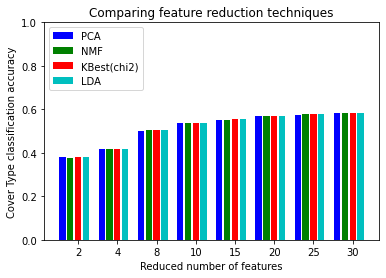

In [588]:
with open(res_path+"CV_gridsearch_models/"+"cat_reduc_dim"+".pkl", "rb") as f :
    grid= pickle.load(f)
    
mean_scores = np.array(grid.cv_results_["mean_test_score"])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = np.arange(len(N_FEATURES_OPTIONS)) * (len(reducer_labels) + 1) + 0.5

plt.figure()
COLORS = "bgrcmyk"
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel("Reduced number of features")
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel("Cover Type classification accuracy")
plt.ylim((0, 1))
plt.legend(loc="upper left")

plt.show()

In [366]:
grid.best_params_

{'classify__C': 10,
 'reduce_dim': PCA(iterated_power=7, n_components=30),
 'reduce_dim__n_components': 30}

In [606]:
def coeffs_on_4first_compo(X_, my_meth, palette_name = "inferno") : 
    ## fit model
    my_meth.fit(X_)
    my_meth_name = str(my_meth).split("(")[0]
    coeffs = pd.DataFrame(my_meth.components_, columns = X_.columns,
                      index = ["ax_"+str(k) for k in np.arange(1,my_meth.n_components+1)])
    
    ## init plot
    
    palette=sns.color_palette(palette_name, n_colors=int(X_.shape[1]))
    plt.subplot(1,2,1)
    for i,colname in enumerate(coeffs.columns) :
            plt.scatter(x = coeffs.loc["ax_1", colname], 
                        y = coeffs.loc["ax_2", colname],
                        label = colname, color=palette[i],
                        marker="x"
                        )
    plt.xlabel("coeff axis 1")
    plt.ylabel("coeff axis 2")
    plt.title(my_meth_name+" on categorical data \nAxis 1 and 2",fontsize=14)
    plt.legend("",frameon=False)

    plt.subplot(1,2,2)
    for i,colname in enumerate(coeffs.columns) :
        plt.scatter(x = coeffs.loc["ax_3", colname], 
                    y = coeffs.loc["ax_4", colname],
                    label = colname, color=palette[i],
                    marker="x"
                    )
    plt.xlabel("coeff axis 3")
    plt.ylabel("coeff axis 4")
    my_meth_name = str(my_meth).split("(")[0]
    plt.title(my_meth_name+" on categorical data \nAxis 3 and 4",fontsize=14)
    plt.legend(title="X variables", bbox_to_anchor=(1, 1), ncol=3)

In [607]:
def print_projection_on_axes(X_proj, my_meth_name, labels):
    plt.subplot(1,2,1)
    for cover_type in labels.unique():
        idx = labels[labels == cover_type].index
        plt.scatter(x=X_proj.loc[idx,"ax_1"], y=X_proj.loc[idx,"ax_2"], 
                     alpha = 0.5, marker="x", 
                     label = str(cover_type)
                   )
    plt.legend("", frameon=False)
    plt.title("Forests on " + my_meth_name + " axis 1 and 2", fontsize=14)
    plt.xlabel(my_meth_name + " axis 1")
    plt.ylabel(my_meth_name + " axis 2")

    plt.subplot(1,2,2)
    for cover_type in labels.unique():
        idx = labels[labels == cover_type].index
        plt.scatter(x=X_proj.loc[idx,"ax_3"], y=X_proj.loc[idx,"ax_4"], 
                     alpha = 0.5, marker="x", 
                     label = str(cover_type)
                   )
    plt.legend(title="Cover Type", bbox_to_anchor=(1, 1))
    plt.title("Forests on " + my_meth_name + " axis 3 and 4", fontsize=14)
    plt.xlabel(my_meth_name + " axis 3")
    plt.ylabel(my_meth_name + " axis 4")

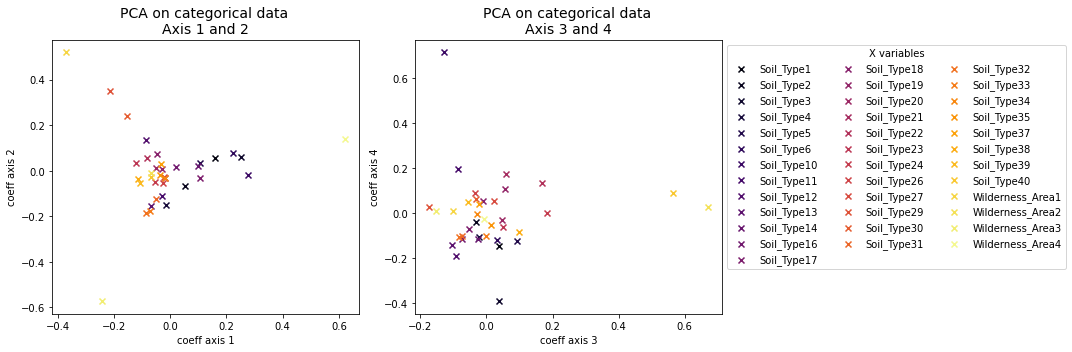

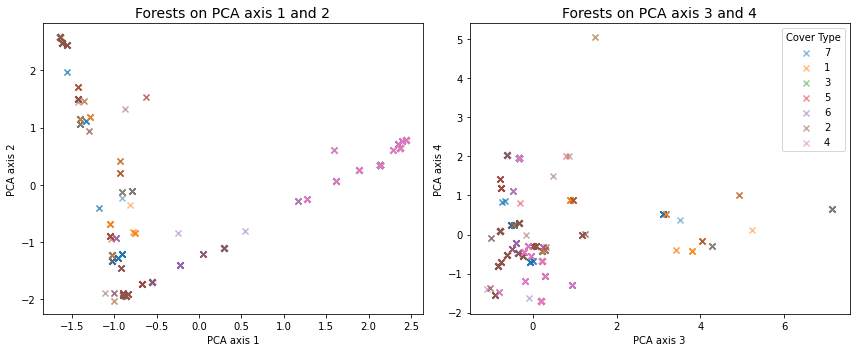

In [567]:
X_ = StandardScaler().fit_transform(X_train)
X_ = pd.DataFrame(X_, index=X_train.index, columns=X_train.columns)
my_meth = PCA(n_components=4).fit(X_)
my_meth_name = "PCA"
plt.figure(figsize=(15,5))
coeffs_on_4first_compo(X_, my_meth)
plt.tight_layout()
plt.show()


X_proj = pd.DataFrame(my_meth.transform(X_), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,5)])
X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, my_meth_name, labels)
plt.tight_layout()
plt.show()

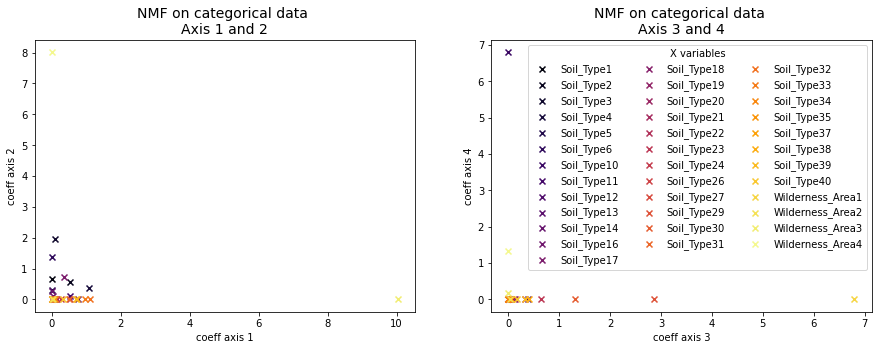

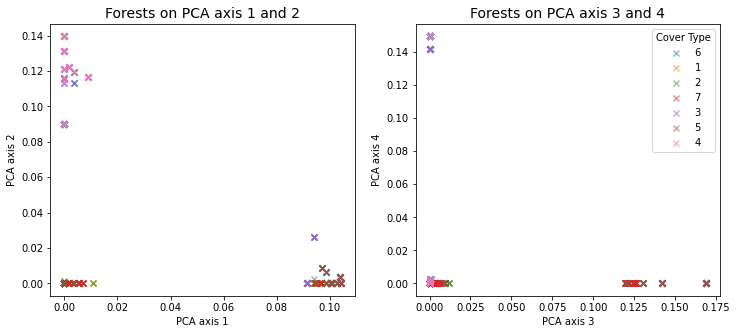

In [569]:
my_meth = NMF(init="nndsvda", n_components=4)
plt.figure(figsize=(15,5))
coeffs_on_4first_compo(X_train, my_meth)
plt.show()

## project on 4 axis an color with output classif
X_proj = pd.DataFrame(my_meth.transform(X_train), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,5)])

X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, my_meth_name, labels)
plt.show()

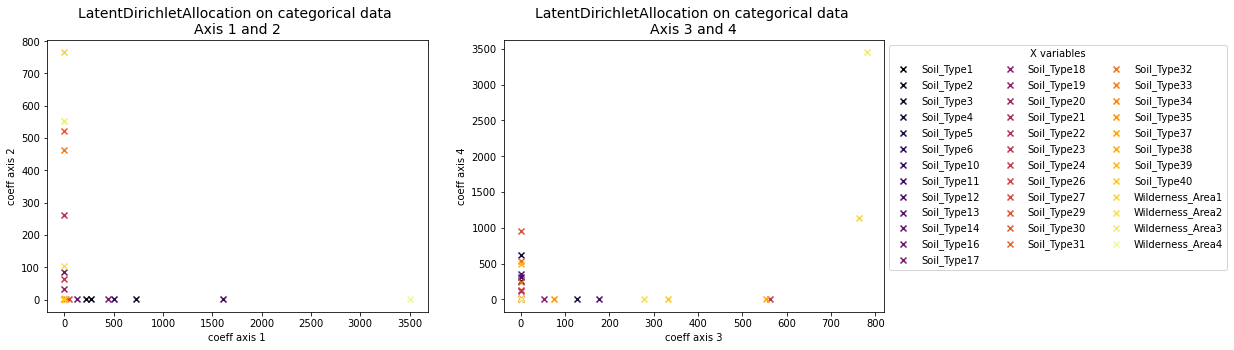

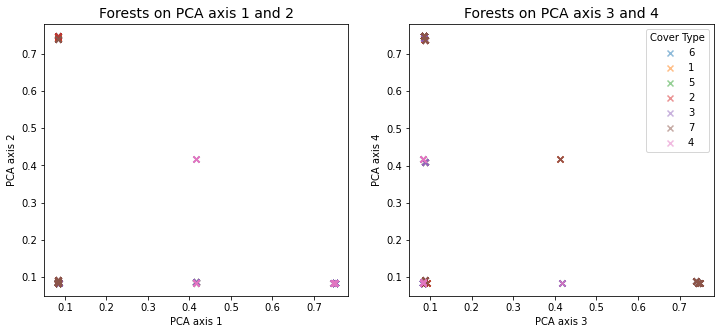

In [570]:
my_meth = LatentDirichletAllocation(n_components=4)
plt.figure(figsize=(15,5))
coeffs_on_4first_compo(X_train, my_meth)
plt.show()

## project on 4 axis an color with output classif
X_proj = pd.DataFrame(my_meth.transform(X_train), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,5)])

X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, my_meth_name, labels)
plt.show()

<!-- Ces méthodes de projection n'ont pas l'air de bien séparer les classes de sols. Vu que les dimensions sont petites, on restera juste avec les variables numériques. Autres idées pour réduire la dimension : 
Lancer une ANOVA "cover_type $\sim$ numerical_var" pour voir comment les chemins de régularisation évoluent. Cela permettrait de répondre à la question "est ce que la variable numérique sépare bien les classes de la variable catégorielle" -->

These projection methods do not seem to separate the soil classes well. Since the dimensions are small, we will just stay with the numerical variables. 


Other ideas to reduce the dimension
* Use the ANOVA $\eta$ score to ponderate the variables ? 

<a id ="section2"></a>
<a id ="section2.1"></a>

[back to menu](#menu)

# 2. Exploratory Analysis for Numerical data 
Let's now tackle the 10 numerical variables : 

## 2.1 Univariate analysis

In [592]:
X_num = X.loc[:,num_vars]
X_numy = pd.concat((X_num, y), axis = 1)

X_num.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


In [593]:
palette = sns.color_palette("tab10", len(y.unique()))
# sns.pairplot(X_numy, hue = "Cover_Type", palette = palette, kind="kde")
# plt.savefig(RES_PATH + "figures/"+"pairplot_kde_colored_by_output")
# sns.pairplot(X_num)
# plt.savefig(RES_PATH + "figures/"+"pairplot")
plt.show()

<a id ="section2.2"></a>
[back to menu](#menu)
## 2.B Multivariate analysis

In [594]:
my_std = StandardScaler().fit(X_num)
X_num_std = pd.DataFrame(my_std.transform(X_num), index=X_num.index, columns=X_num.columns)

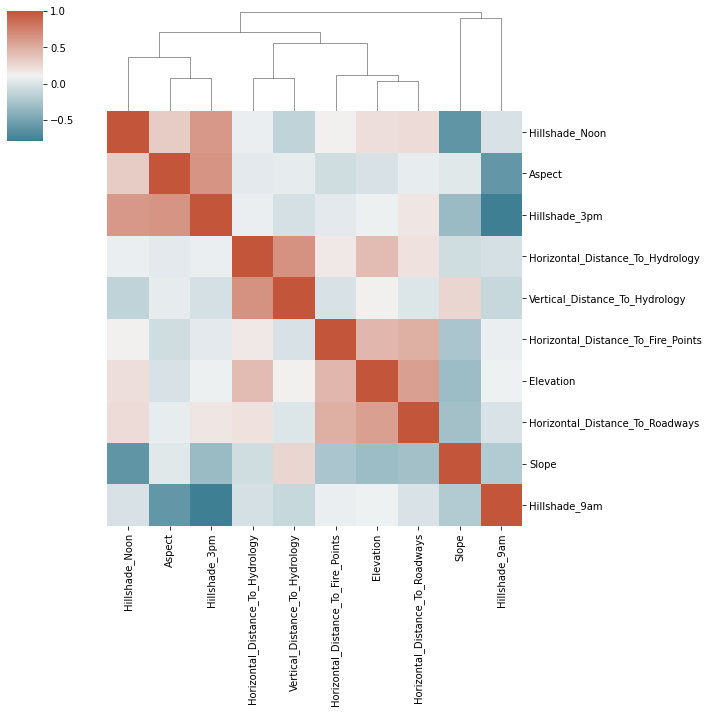

In [595]:
corr_std = X_num_std.corr()
cg = sns.clustermap(corr_std, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
cg.ax_row_dendrogram.set_visible(False)
plt.savefig(RES_PATH + "figures/"+"correlation_matrix")


Some variables are correlated and anti-correlated. A selection of variables will be mandatory. 
### Numerical VS output : 

In [596]:
def eta_squared(cat_var,num_var):
    global_mean = num_var.mean()
    modes = []
    for j in cat_var.unique():
        num_in_j = num_var[cat_var==j]
        modes.append({'ni': len(num_in_j),
                        'mode_mean': num_in_j.mean()})
    SCT = sum([(num_in_j-global_mean)**2 for num_in_j in num_var])
    SCE = sum([c['ni']*(c['mode_mean']-global_mean)**2 for c in modes])
    return SCE/SCT

Hillshade_Noon


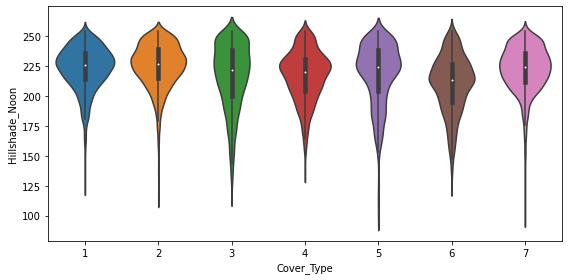

ANOVA $\eta^2$ =  0.017120193290670573
Aspect


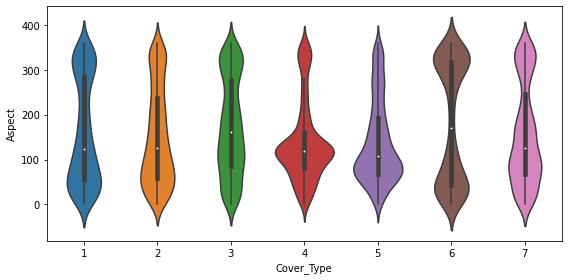

ANOVA $\eta^2$ =  0.030370937528696688
Hillshade_3pm


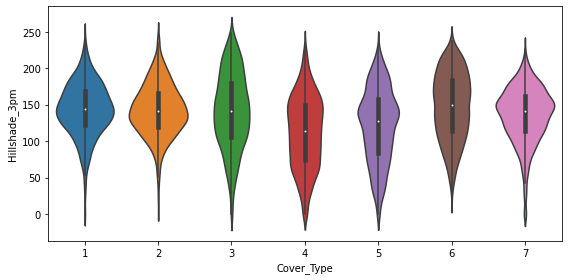

ANOVA $\eta^2$ =  0.021280894352925506
Horizontal_Distance_To_Hydrology


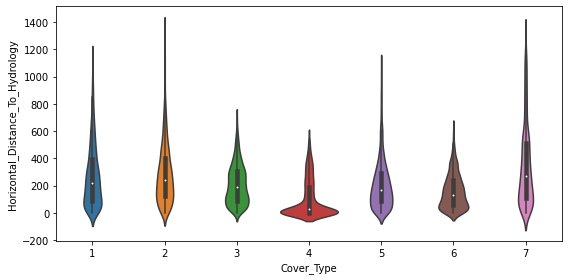

ANOVA $\eta^2$ =  0.051818747263081215
Vertical_Distance_To_Hydrology


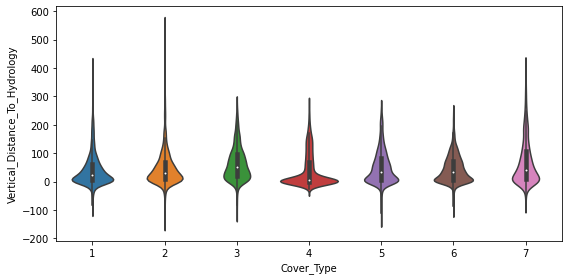

ANOVA $\eta^2$ =  0.039403375236451384
Horizontal_Distance_To_Fire_Points


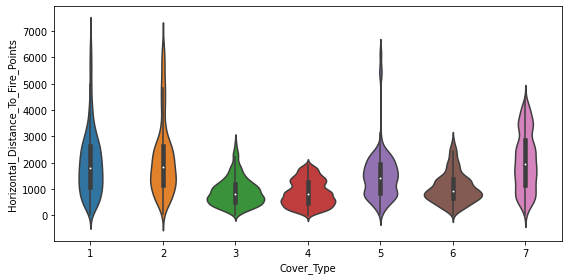

ANOVA $\eta^2$ =  0.25200587068413177
Elevation


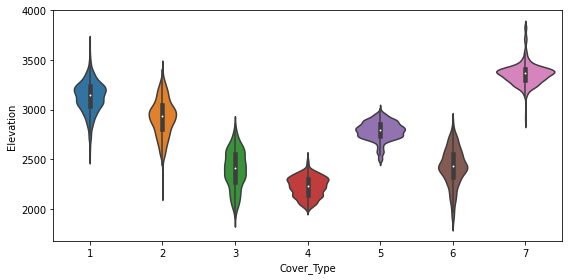

ANOVA $\eta^2$ =  0.44226569379996816
Horizontal_Distance_To_Roadways


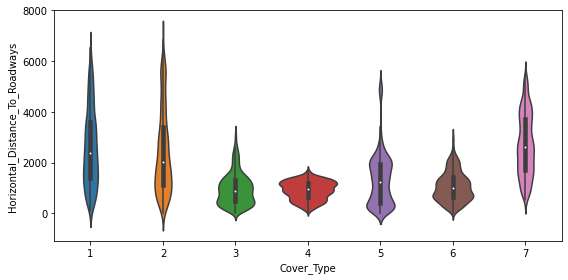

ANOVA $\eta^2$ =  0.31908345052902876
Slope


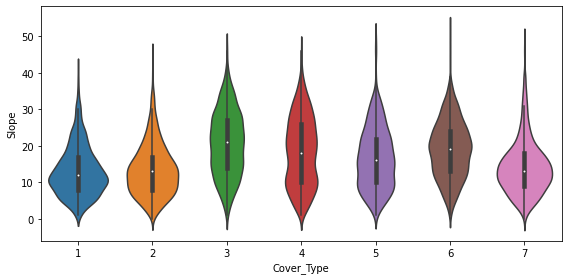

ANOVA $\eta^2$ =  0.013398122014163336
Hillshade_9am


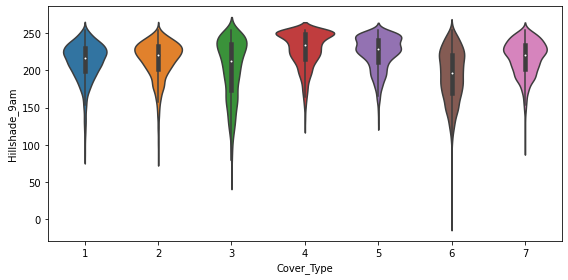

ANOVA $\eta^2$ =  0.0168497656115509


In [599]:
for num_v in X_num_std.columns[cg.dendrogram_col.reordered_ind] : 
    print(num_v)
    plt.figure(figsize=(8,4))
    sns.violinplot(y = num_v, x = "Cover_Type", data = X_numy)
#     plt.yscale("log")
    plt.tight_layout()
    plt.show()
    print("ANOVA $\eta^2$ = ",  eta_squared(X_num.loc[:,num_v],y))

The variable "Elevation" seems to separate the soil covers well. The other variables do not seem to be discriminating.

<a id ="section2.3"></a>
<a id ="section2.3.1"></a>
[back to menu](#menu)

## 2.C Feature Engeneering

Let's follow the same methodology, adapted to numerical features : 
<!-- * https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py -->


### 2.C.a Classical preprocess

#### Drop constant variables :
First of all, let's check the standard deviation of each variable : 

In [601]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1))
sel.fit(X_num)
len(sel.get_feature_names_out())

10

There are no not-variant variable. 

#### Train test split : 
The numerical data have already been center-reduced (before correlation matrix heatmap). 
Let's split data for feature engeneering of numerical variables :

In [602]:
X_train, X_test, y_train, y_test = train_test_split(X_num_std, y, random_state=10)
## same random state to be consistent with the first part :) 

#### A classifier predictor of cover type 
To follow the evolution of prediction while engeneering feature, we will need a basic model (to be improved) 

<a id ="section2.3.2"></a>
[back to menu](#menu)

### 1.C.b Feature Selection : 

Let's call again the [Feature selection User Guide of sklearn](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection). As we now tackle numerical data, we can call the RFE sklearn process for feature selection : 

#### Feature selection with RFE :

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py


Optimal number of features : 9


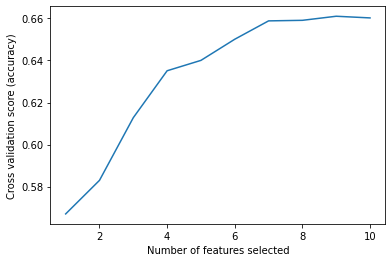

In [118]:
## https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(4),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
mean_score = rfecv.cv_results_["mean_test_score"]
plt.plot(
    range(min_features_to_select, len(mean_score) + min_features_to_select),
    mean_score
)
plt.show()

In [101]:
# chi2, f_classif
anova_filter = SelectKBest(f_classif, k=3)
clf = LinearSVC(dual=False)
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k=3)),
                ('linearsvc', LinearSVC(dual=False))])

In [102]:
y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=True))


              precision    recall  f1-score   support

           1       0.43      0.34      0.38       537
           2       0.41      0.37      0.39       529
           3       0.38      0.40      0.39       551
           4       0.51      0.91      0.65       528
           5       0.56      0.51      0.54       552
           6       0.43      0.10      0.16       560
           7       0.70      0.97      0.81       523

    accuracy                           0.51      3780
   macro avg       0.49      0.51      0.47      3780
weighted avg       0.49      0.51      0.47      3780



<a id ="section2.3.2"></a>
[back to menu](#menu)

### 1.C.c Reduction of dimension : 

[Factor Analysis example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_varimax_fa.html#sphx-glr-auto-examples-decomposition-plot-varimax-fa-py), and [an article](https://www.datacamp.com/community/tutorials/introduction-factor-analysis) to read about FA.

In [589]:
from sklearn.cluster import FeatureAgglomeration
from sklearn.decomposition import FactorAnalysis

pipe = Pipeline(
    [
        # the reduce_dim stage is populated by the param_grid
        ("reduce_dim", "passthrough"),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

N_FEATURES_OPTIONS = [2, 4, 6, 8, 10]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        "reduce_dim": [PCA(),  FactorAnalysis()],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [FeatureAgglomeration()],
        "reduce_dim__n_clusters": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(f_classif)], ## chi2 need non neg matrix
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]
reducer_labels = ["PCA", "FA", "hclust", "KBest(chi2)"]

grid = GridSearchCV(pipe, cv=5, n_jobs=8, param_grid=param_grid)
# grid.fit(X_train, y_train)
# with open(res_path+"CV_gridsearch_models/"+"num_reduc_dim"+".pkl", "wb") as f :
#     pickle.dump(grid, f, pickle.HIGHEST_PROTOCOL)

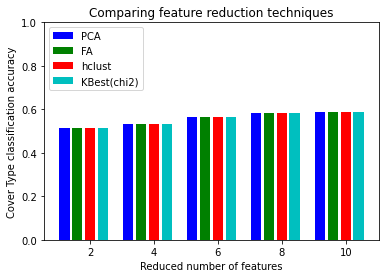

In [590]:

with open(res_path+"CV_gridsearch_models/"+"num_reduc_dim"+".pkl", "rb") as f :
    grid= pickle.load(f)

    
mean_scores = np.array(grid.cv_results_["mean_test_score"])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = np.arange(len(N_FEATURES_OPTIONS)) * (len(reducer_labels) + 1) + 0.5

plt.figure()
COLORS = "bgrcmyk"
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel("Reduced number of features")
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel("Cover Type classification accuracy")
plt.ylim((0, 1))
plt.legend(loc="upper left")

plt.show()

Les projections par pondération : 

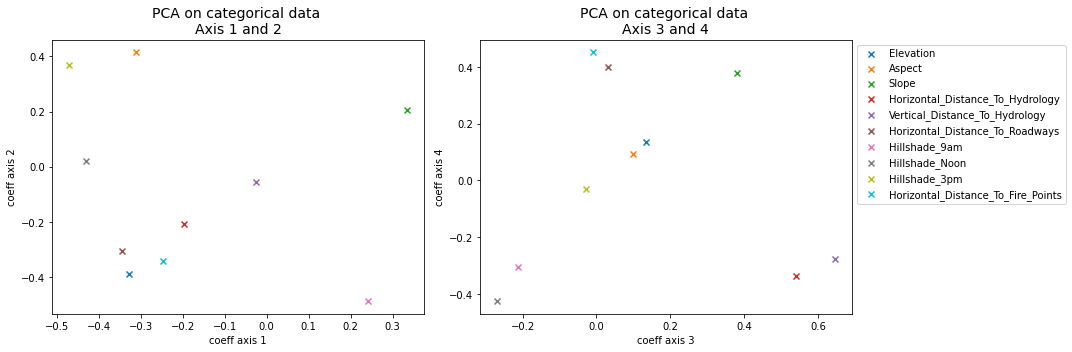

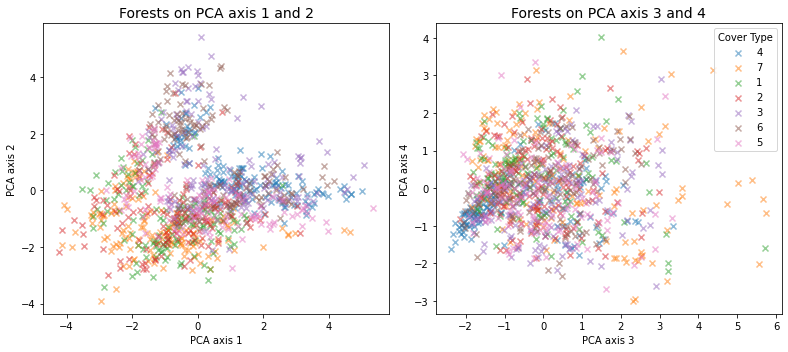

In [620]:
X_ = StandardScaler().fit_transform(X_train)
X_ = pd.DataFrame(X_, index=X_train.index, columns=X_train.columns)
my_meth = PCA(n_components=4).fit(X_)
my_meth_name = "PCA"
# my_meth = FactorAnalysis(n_components=4).fit(X_)
# my_meth_name = "FA"

plt.figure(figsize=(15,5))
coeffs_on_4first_compo(X_, my_meth, palette_name = "tab10")
plt.legend(ncol=1, bbox_to_anchor= (1,1))
plt.tight_layout()
plt.show()


X_proj = pd.DataFrame(my_meth.transform(X_), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,5)])
X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, my_meth_name, labels)
plt.tight_layout()
plt.show()

In [631]:
hclust = FeatureAgglomeration(n_clusters=4).fit(X_train)
for k in range(4) :
    idx_bool = hclust.labels_ == k
    print(k, my_meth.feature_names_in_[idx_bool])

0 ['Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology']
1 ['Aspect' 'Hillshade_Noon' 'Hillshade_3pm']
2 ['Elevation' 'Horizontal_Distance_To_Roadways'
 'Horizontal_Distance_To_Fire_Points']
3 ['Hillshade_9am']


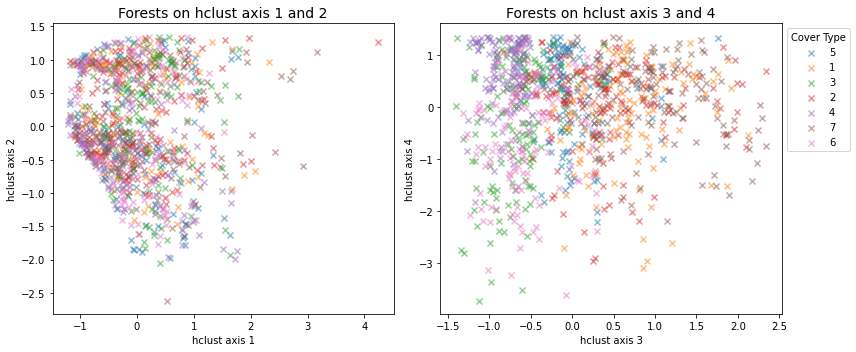

In [649]:
X_proj = pd.DataFrame(index=X_train.index)
for k in range(4) :
    idx_bool = hclust.labels_ == k
    cluster_vars = my_meth.feature_names_in_[idx_bool]
    X_proj.loc[:,"ax_"+str(k+1)] = X_train.loc[:, cluster_vars].mean(axis=1)
X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, "hclust", labels)
plt.tight_layout()
plt.show()

# 3. Classification : 

In [90]:
num_vars

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']


* Run a "cover_type $\sim$ numerical_var" ANOVA to see how the regularization paths change. This would answer the question "does the numerical variable separate the classes well from the categorical variable?"